In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist


Using TensorFlow backend.


In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
len(x_train)

60000

In [5]:
len(x_test)

10000

In [6]:
x_train[87]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

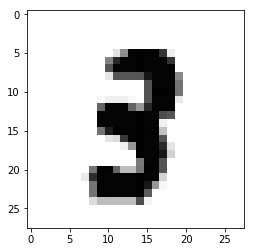

In [7]:
plt.imshow(x_train[8794], cmap="Greys")

In [8]:
y_train[8794]

3

In [9]:
x_train[8794].shape

(28, 28)

In [11]:

x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [12]:
x_train[8794].shape

(784,)

In [13]:
from keras.utils import np_utils

In [14]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [15]:
y_train[8794]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [16]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import  SGD

In [17]:
model_1 = Sequential()

In [18]:
model_1.add(Dense(4, input_dim=784))
model_1.add(Activation("sigmoid"))

Instructions for updating:
Colocations handled automatically by placer.


In [19]:
model_1.add(Dense(2))
model_1.add(Activation("sigmoid"))


In [20]:
model_1.add(Dense(10))
model_1.add(Activation("softmax"))

In [21]:
model_1.compile(loss = 'mse', 
              optimizer = SGD(lr=0.087),
              metrics = ["accuracy"])

In [22]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 3140      
_________________________________________________________________
activation_1 (Activation)    (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                30        
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 3,180
Trainable params: 3,180
Non-trainable params: 0
_________________________________________________________________


In [23]:
model_1_20 = model_1.fit(x_train, y_train, 
          batch_size=100, 
          epochs=20, 
          verbose=1, 
          validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0909 - acc: 0.0991 - val_loss: 0.0906 - val_acc: 0.1009
Epoch 2/20
60000/60000 [==============================] - 1s 11us/step - loss: 0.0906 - acc: 0.0991 - val_loss: 0.0904 - val_acc: 0.1009
Epoch 3/20
60000/60000 [==============================] - 1s 11us/step - loss: 0.0904 - acc: 0.0992 - val_loss: 0.0903 - val_acc: 0.1009
Epoch 4/20
60000/60000 [==============================] - 1s 11us/step - loss: 0.0903 - acc: 0.0996 - val_loss: 0.0901 - val_acc: 0.1042
Epoch 5/20
60000/60000 [==============================] - 1s 11us/step - loss: 0.0901 - acc: 0.1019 - val_loss: 0.0899 - val_acc: 0.1044
Epoch 6/20
60000/60000 [==============================] - 1s 11us/step - loss: 0.0899 - acc: 0.1500 - val_loss: 0.0897 - val_acc: 0.1631
Epoch 7/20
60000/60000 [==============================] - 1s 11us/step - loss: 0

## Normalize

把資料放在0~1區間 使參數不受極大或極小值影響


法1 處理最大值

In [24]:
x_train_1 = x_train /x_train.max()
x_test_1=x_test / x_test.max()

In [25]:
x_train_1.max()

1.0

法2  (一般來說最好先標準化在分類）

In [28]:
x_train_2=(x_train - x_train.min())/(x_train.max()-x_train.min())
x_test_2=(x_test - x_test.min())/(x_test.max()-x_test.min())

In [29]:
x_train_2.max()

1.0

In [43]:
model_2 = Sequential()
model_2.add(Dense(4, input_dim=784))
model_2.add(Activation("sigmoid"))
model_2.add(Dense(2))
model_2.add(Activation("sigmoid"))
model_2.add(Dense(10))
model_2.add(Activation("softmax"))
model_2.compile(loss = 'mse', 
              optimizer = SGD(lr=0.05),
               metrics = ["accuracy"])
model_2.summary()

#上面有很多地方可以選。直接打 keras 就有了
# Activation function https://en.wikipedia.org/wiki/Activation_function

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 4)                 3140      
_________________________________________________________________
activation_7 (Activation)    (None, 4)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 10        
_________________________________________________________________
activation_8 (Activation)    (None, 2)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                30        
_________________________________________________________________
activation_9 (Activation)    (None, 10)                0         
Total params: 3,180
Trainable params: 3,180
Non-trainable params: 0
_________________________________________________________________


In [34]:
model_2_20 = model_2.fit(x_train_1,y_train,#選要標準化的數據
                        batch_size = 100,
                        epochs = 20, #次數
                        verbose = 1, #看要不要讓結果跑出來 （有0,1,2)
                        validation_data = (x_test_1 , y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0909 - acc: 0.0974 - val_loss: 0.0908 - val_acc: 0.0982
Epoch 2/20
60000/60000 [==============================] - 1s 11us/step - loss: 0.0907 - acc: 0.0974 - val_loss: 0.0906 - val_acc: 0.0982
Epoch 3/20
60000/60000 [==============================] - 1s 12us/step - loss: 0.0905 - acc: 0.0974 - val_loss: 0.0905 - val_acc: 0.0982
Epoch 4/20
60000/60000 [==============================] - 1s 11us/step - loss: 0.0904 - acc: 0.0974 - val_loss: 0.0904 - val_acc: 0.0982
Epoch 5/20
60000/60000 [==============================] - 1s 12us/step - loss: 0.0903 - acc: 0.0974 - val_loss: 0.0903 - val_acc: 0.0982
Epoch 6/20
60000/60000 [==============================] - 1s 11us/step - loss: 0.0902 - acc: 0.0974 - val_loss: 0.0902 - val_acc: 0.0982
Epoch 7/20
60000/60000 [==============================] - 1s 12us/step - loss: 0.0902 - acc: 0.0974 - val_loss: 0.0901 - val_acc

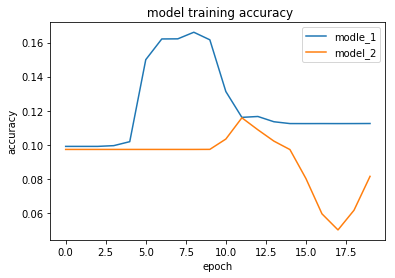

In [41]:
plt.plot(model_1_20.history["acc"])
plt.plot(model_2_20.history["acc"])

plt.title(' model training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['modle_1','model_2'],  loc = "best")
plt.show()

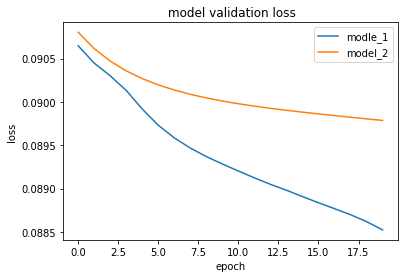

In [42]:
plt.plot(model_1_20.history["val_loss"])
plt.plot(model_2_20.history["val_loss"])

plt.title(' model validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['modle_1','model_2'],  loc = "best")
plt.show()

## softmax
### ${\displaystyle f_{i}({\vec {x}})={\frac {e^{x_{i}}}{\sum _{j=1}^{J}e^{x_{j}}}}}$

### Range : $(0,1)$
### 可以將輸出值轉換成像是機率分佈，全部輸出加起來等於1

## tanh
### ${\displaystyle f(x)=\tanh(x)={\frac {(e^{x}-e^{-x})}{(e^{x}+e^{-x})}}}$
### Range : $(-1,1)$

In [44]:
def tanh(x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

In [45]:
x = np.linspace(-10, 10, 200)

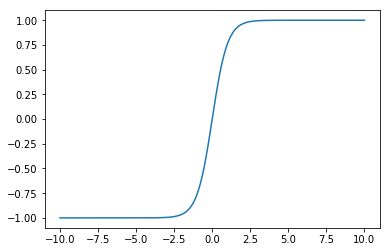

In [46]:
plt.plot(x, tanh(x))

## sigmoid
### ${\displaystyle f(x)={\frac {1}{1+e^{-x}}}}$
#### 很常使用

In [65]:
def sigmoid(x):
    return 1.0 /(1.0 + np.exp(-x))

## 只想要正值的時候


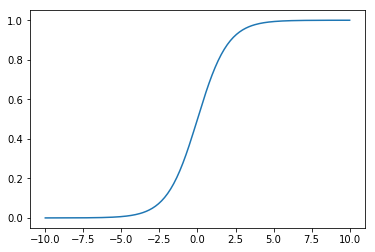

In [69]:
plt.plot(x,sigmoid(x))

### elu

In [66]:
def elu(x, a):
    y = x.copy()
    for i in range(len(y)):
        if y[i]<0:
            y[i] = a * (np.exp(y[i])-1)
    return y

## a是可以自己調整的 當是負值的可以調整讓他更大獲更小

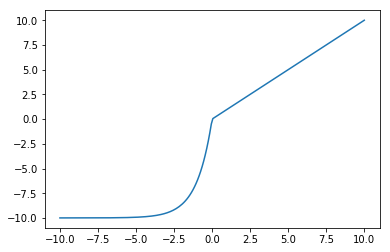

In [67]:
plt.plot(x,elu(x,10))

## relu
### ${\displaystyle f(x)={\begin{cases}0&amp;{\text{for }}x&lt;0\\x&amp;{\text{for }}x\geq 0\end{cases}}}$
### Range : $[0,\infty )$
#### 消去負值

In [56]:
def relu(x):
    y = x.copy()
    y[y < 0] = 0
    return y

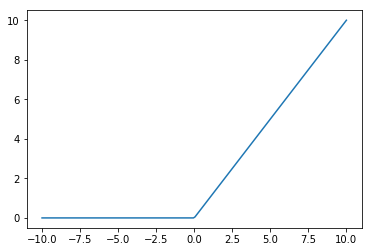

In [57]:
plt.plot(x,relu(x))

## selu
### ${\displaystyle f(\alpha ,x)=\lambda {\begin{cases}\alpha (e^{x}-1)&amp;{\text{for }}x&lt;0\\x&amp;{\text{for }}x\geq 0\end{cases}}}
 with {\displaystyle \lambda =1.0507} and {\displaystyle \alpha =1.67326}$

#### 他會自動幫你帶入 alpha and lambda
### Range : ${\displaystyle (-\lambda \alpha ,\infty )}$
### softplus
### softsign
### hard_sigmoid
### linear
### Loss Funciton
### 可參考keras檔案：https://keras.io/losses/
### mean_squared_error
### ${\displaystyle \operatorname {MSE} ={\frac {1}{n}}\sum _{i=1}^{n}(Y_{i}-{\hat {Y_{i}}})^{2}}$

## Loss Function


## mean_squared_error
###${\displaystyle \operatorname {MSE} ={\frac {1}{n}}\sum _{i=1}^{n}(Y_{i}-{\hat {Y_{i}}})^{2}}$

In [60]:
def mse(true, pred):
    a = 0
    for i in range(len(true)):
        a += (true - pred)**2
    return a / len(true)

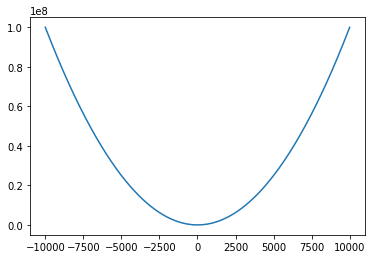

In [61]:
target = np.repeat(0, 10000) 
pred = np.arange(-10000,10000, 2)
plt.plot(pred, mse(target, pred))

## mean_absolute_error
### ${\displaystyle \mathrm {MAE} ={\frac {1}{n}{\sum _{i=1}^{n}\left|Y_{i}-{\hat {Y_{i}}}\right|}}}$

In [62]:
def mae(true, pred):
    a = 0
    for i in range(len(true)):
        a += np.abs((true - pred))
    return a / len(true)

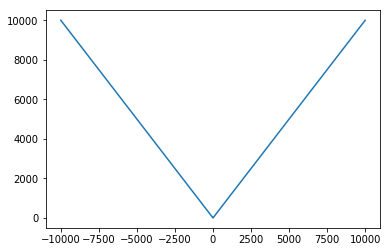

In [63]:
plt.plot(pred, mae(target, pred))


## binary_crossentropy
### ${\displaystyle \mathrm -{\frac {1}{N}}\sum _{n=1}^{N}\ {\bigg [}y_{n}\log {\hat {y}}_{n}+(1-y_{n})\log(1-{\hat {y}}_{n}){\bigg ]}}$

#### 看兩筆資料的分布差異～

## categorical_crossentropy
### ${\displaystyle \mathrm -{\frac  {1}{N}}\sum _{{i=1}}^{N}\sum _{{c=1}}^{C}{1_{y_i \in C_c}}\log p_{model}[y_i \in C_c]}$
#### 可參考此篇討論：https://github.com/keras-team/keras/issues/6444
### mean_absolute_percentage_error
### mean_squared_logarithmic_error
### squared_hinge
### hinge
### sparse_categorical_crossentrop
### kullback_leibler_divergence
### poisson
### cosine_proximity
## Optimizer 優化
#### 可參考keras檔案：https://keras.io/optimizers/
### SGD 使用偏微分
### RMSprop
### Adagrad 依照梯度調整 lr 
### Adadelta 樓上改良
### Adam  比較常用
### Adamax  
### Nadam
